<a href="https://colab.research.google.com/github/Dhanushkumar0406/SKIIRYT-AI-TRAINING-SESSION/blob/materials/GRADUATE_USING_REGRESSION_%26_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*1 - INSTALL PIP*

In [82]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow


*2 - INSTALL LIBRARIES*

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


*3 - LOAD DATASET*

In [84]:
import pandas as pd

graduate_df = pd.read_csv('/content/Admission_Predict.csv')
display(graduate_df.head())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


READ HEADING

In [85]:

graduate_df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


ROWS & COLUMNS

In [86]:
graduate_df.shape

(400, 9)

In [ ]:
INFORMATION

In [87]:
graduate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


FINDING DUPLICATES

In [88]:
graduate_df.duplicated().sum()

np.int64(0)

DESCRIBE DATA

In [89]:
graduate_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [90]:
graduate_df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


Drop Unnecessary Columns

In [91]:

if "Serial No." in graduate_df.columns:
    graduate_df = graduate_df.drop(columns=["Serial No."])
graduate_df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Feature Matrix and Target Vector

In [92]:
X = graduate_df.drop(columns=["Chance of Admit "])
y = graduate_df["Chance of Admit "]


Train-Test Split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


FEAUTRE SCALING

In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# COMPARISON -1 :: **REGRESSOR*

In [95]:
#fit the model

from sklearn.tree import DecisionTreeRegressor

modeldf= DecisionTreeRegressor()
modeldf.fit(X_train,y_train) # model learned

DecisionTreeRegressor()

In [96]:
## predict
y_preddf = modeldf.predict(X_test)

In [97]:
#r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_preddf)

0.6127053086020107

In [98]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preddf)

0.01000125

In [99]:
#fit the model

from sklearn.linear_model import LinearRegression
model2df= LinearRegression()
model2df.fit(X_train,y_train) # model learned

LinearRegression()

In [100]:
## predict
y_preddf2 = model2df.predict(X_test)

In [101]:
#r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_preddf2)

0.8212082591486991

In [102]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preddf2)

0.004617003377285012

In [103]:
from sklearn.neighbors import KNeighborsRegressor
model3df=KNeighborsRegressor()
model3df.fit(X_train,y_train)

KNeighborsRegressor()

In [104]:
from sklearn.metrics import r2_score
y_preddf3 = model3df.predict(X_test)
r2_score(y_test,y_preddf3)

0.7560329038328306

In [105]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preddf3)

0.006300049999999999

In [106]:
from sklearn.ensemble import RandomForestRegressor
model4df=RandomForestRegressor()
model4df.fit(X_train,y_train)

RandomForestRegressor()

In [107]:
#predict
from sklearn.metrics import r2_score
y_preddf4 = model4df.predict(X_test)
r2_score(y_test,y_preddf4)

0.8083283461255706

In [108]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_preddf4)

0.0049496060000000005

### `**Build ANN Model**`

In [109]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
X_train_scaled

array([[0.64      , 0.64285714, 0.5       , ..., 0.375     , 0.59935897,
        1.        ],
       [0.56      , 0.64285714, 0.5       , ..., 0.5       , 0.64102564,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.875     , 0.99679487,
        1.        ],
       ...,
       [0.32      , 0.46428571, 0.25      , ..., 0.5       , 0.45512821,
        1.        ],
       [0.24      , 0.25      , 0.        , ..., 0.25      , 0.14423077,
        0.        ],
       [0.48      , 0.5       , 0.25      , ..., 0.625     , 0.46474359,
        0.        ]])

In [111]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [112]:
model = Sequential()

In [113]:
graduate_df.shape

(400, 8)

In [114]:
model = Sequential()



In [115]:
model.add(Dense(8,activation = 'relu',input_dim=8))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 7)              │            63 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143 (572.00 B)

 Trainable params: 143 (572.00 B)

 Non-trainable params: 0 (0.00 B)

correct and standard way to add to Epochs

In [117]:
model.add(Dense(8,activation = 'relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [118]:
model = Sequential()
print("Keras Sequential model re-initialized.")

Keras Sequential model re-initialized.


In [119]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

In [123]:


history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0574 - val_loss: 0.0082 - val_mean_absolute_error: 0.0661
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0583 - val_loss: 0.0081 - val_mean_absolute_error: 0.0652
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mean_absolute_error: 0.0561 - val_loss: 0.0082 - val_mean_absolute_error: 0.0660
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0576 - val_loss: 0.0080 - val_mean_absolute_error: 0.0642
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0058 - mean_absolute_error: 0.0568 - val_loss: 0.0080 - val_mean_absolute_error: 0.0642
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0061 - mean_absolute_error: 0.0576 - val_loss: 0.0080 - val_mean_absolute_error: 0.0649
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0055 - mean_absolute_error: 0.0569 - val_los

In [124]:

from sklearn.model_selection import train_test_split # Needed for train_test_split
from tensorflow.keras.callbacks import EarlyStopping
# Re-initialize the model to ensure it's defined
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=X_train.shape[1])) # Use X_train.shape[1] for input_dim
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

# Re-compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mean_squared_error',
    metrics=['mean_absolute_error']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=0.1, restore_best_weights=True)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    callbacks=[early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.5563 - mean_absolute_error: 0.6779 - val_loss: 0.2874 - val_mean_absolute_error: 0.4858
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2408 - mean_absolute_error: 0.4455 - val_loss: 0.1213 - val_mean_absolute_error: 0.2937
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1285 - mean_absolute_error: 0.2980 - val_loss: 0.1192 - val_mean_absolute_error: 0.2924
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0974 - mean_absolute_error: 0.2555 - val_loss: 0.0955 - val_mean_absolute_error: 0.2604
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0803 - mean_absolute_error: 0.2358 - val_loss: 0.0723 - val_mean_absolute_error: 0.2226
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0702 - mean_absolute_error: 0.2118 - val_loss: 0.0623 - val_mean_absolute_error: 0.2027
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0600 - mean_absolute_error: 0.1994 - val_loss: 0.0557 -

In [125]:
y_pred = model.predict(X_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [126]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5879077268689074

using Plot

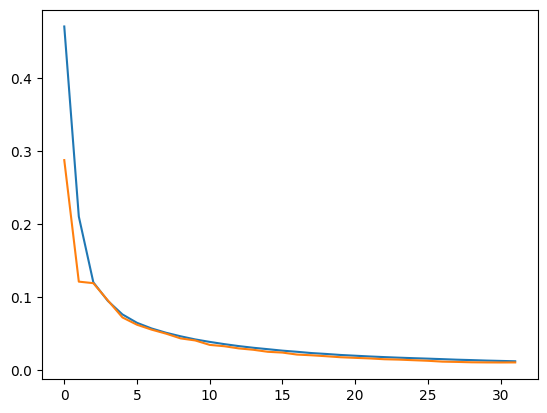

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

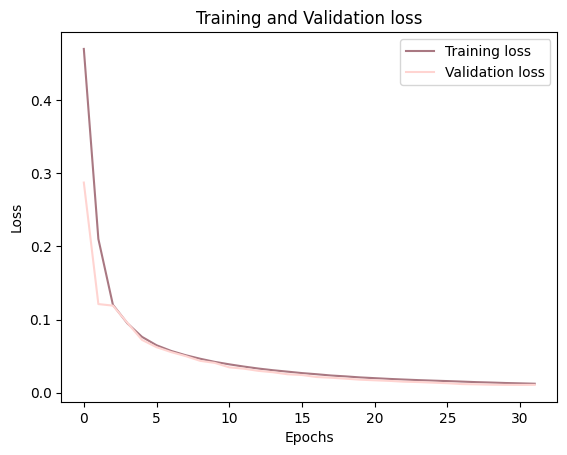

In [128]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#a97882", label='Training loss'),
plt.plot(history_df.loc[:, ['val_loss']],"#ffd4d1", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()